# Density Difference by Orbit

Have a look at the change in density from one orbit to the next during quiet time and storm phases.

In [1]:
#plot matplotlib figures in the notebook
%matplotlib inline

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
# import stats module
from scipy import stats
# import plotting
import matplotlib.pyplot as plt


In [2]:
sat = 'B'
orb = 90
dt = 10

sf = f'D:\\data\\SatDensities\\density_diff_database_grace_{sat}.hdf5'

In [3]:
sat_df = pd.read_hdf(sf)
sat_df.columns

Index(['DateTime_x', 'SatLat', 'SatDipoleLat_x', 'SatLT_x', 'SatMagLon_x',
       'SatMagLT_x', 'SatDensity_x', '400kmDensity_x', 'storm_x',
       'storm phase_x', 'SatLat_x', 'DateTime_y', 'SatDipoleLat_y', 'SatLT_y',
       'SatMagLon_y', 'SatMagLT_y', 'SatDensity_y', '400kmDensity_y',
       'storm_y', 'storm phase_y', 'den_diff'],
      dtype='object')

In [4]:
sat_df['delta_t'] = sat_df['DateTime_y']-sat_df['DateTime_x']
sat_df['delta_tmn'] = sat_df['delta_t'].dt.total_seconds()/60.
sat_df['den_diff'] = -1*sat_df['den_diff']*(10**12)
sat_df['den_diff'] = sat_df['400kmDensity_y']*(10**12) - sat_df['400kmDensity_x']*(10**12)

In [5]:
gd_t = (sat_df['delta_tmn'] >= (orb-dt)) & (sat_df['delta_tmn'] <= (orb+dt)) & (sat_df['den_diff'] > 0.) 
#gd_t = (sat_df['delta_tmn'] >= (orb-dt)) & (sat_df['delta_tmn'] <= (orb+dt))

st_x = (sat_df['storm_x']>0.95) & (sat_df['storm_x']<1.05) # storm times
qt_x = (sat_df['storm_x']<0) # quiet times
mn_x = (sat_df['storm phase_x']>0.95) & (sat_df['storm phase_x']<1.05) # main phase
rc_x = (sat_df['storm phase_x']>1.95) & (sat_df['storm phase_x']<2.05) # recovery phase

st_y = (sat_df['storm_y']>0.95) & (sat_df['storm_y']<1.05) # storm times
qt_y = (sat_df['storm_y']<0) # quiet times
mn_y = (sat_df['storm phase_y']>0.95) & (sat_df['storm phase_y']<1.05) # main phase
rc_y = (sat_df['storm phase_y']>1.95) & (sat_df['storm phase_y']<2.05) # recovery phase


# KS Statistic

In [6]:
print("All vs Quiet: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & qt_x & qt_y,'den_diff'])
print("All vs Storm: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & st_x & st_y,'den_diff'])
print("All vs Main Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & mn_x & mn_y,'den_diff'])
print("All vs Recovery Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & rc_x & rc_y,'den_diff'])

All vs Quiet: 


KstestResult(statistic=0.07002719095075638, pvalue=7.730274103159862e-39, statistic_location=0.23133099999999995, statistic_sign=-1)

All vs Storm: 


KstestResult(statistic=0.018882697559475747, pvalue=7.983191138969719e-08, statistic_location=0.23133099999999995, statistic_sign=1)

All vs Main Phase: 


KstestResult(statistic=0.02061982737335888, pvalue=2.819354636970278e-05, statistic_location=0.23975999999999997, statistic_sign=1)

All vs Recovery Phase: 


KstestResult(statistic=0.014870205812779203, pvalue=0.001069065578440086, statistic_location=0.17069900000000016, statistic_sign=1)

In [7]:
print("Quiet vs Storm: ") 
stats.ks_2samp(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'], sat_df.loc[gd_t & st_x & st_y,'den_diff'])
print("Quiet vs Main Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & mn_x & mn_y,'den_diff'])
print("Quiet vs Recovery Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & rc_x & rc_y,'den_diff'])

Quiet vs Storm: 


KstestResult(statistic=0.08890988851023213, pvalue=8.666168320221897e-60, statistic_location=0.23133099999999995, statistic_sign=1)

Quiet vs Main Phase: 


KstestResult(statistic=0.02061982737335888, pvalue=2.819354636970278e-05, statistic_location=0.23975999999999997, statistic_sign=1)

Quiet vs Recovery Phase: 


KstestResult(statistic=0.014870205812779203, pvalue=0.001069065578440086, statistic_location=0.17069900000000016, statistic_sign=1)

# Histograms

In [8]:
#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [9]:
#sat_df.loc[gd_t,'den_diff'].min()
sat_df.loc[gd_t,'den_diff'].min()

3.000000000419334e-06

<bound method Figure.draw of <Figure size 1100x500 with 4 Axes>>

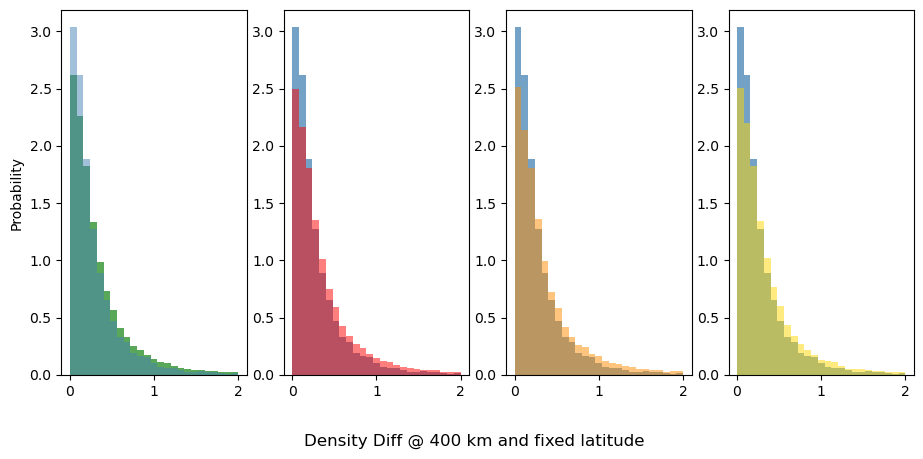

In [10]:
# define bins
h_bins = np.histogram_bin_edges(sat_df.loc[gd_t,'den_diff'],bins='doane',range=(0,2))

density=True

fig, ax = plt.subplots(1,4, figsize=(11,5),gridspec_kw={'bottom':0.15})

ax[0].hist(sat_df.loc[gd_t,'den_diff'],bins=h_bins, alpha = 0.75, label='All', density=density, color='forestgreen')
ax[0].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Quiet', density=density, color='steelblue')

ax[1].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.75, label='Quiet', density=density, color='steelblue')
ax[1].hist(sat_df.loc[gd_t & st_x & st_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Storm', density=density, color= 'red')

ax[2].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.75, label='Quiet', density=density, color='steelblue')
ax[2].hist(sat_df.loc[gd_t & mn_x & mn_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Main Phase', density=density, color='darkorange')

ax[3].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.75, label='Quiet', density=density, color='steelblue')
ax[3].hist(sat_df.loc[gd_t & rc_x & rc_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Recovery Phase', density=density, color='gold')

ax[0].set_ylabel('Probability')
fig.supxlabel('Density Diff @ 400 km and fixed latitude', y=0.002)

fig.draw


# CDFs

Text(0.5, 0.002, 'Density Diff @ 400 km')

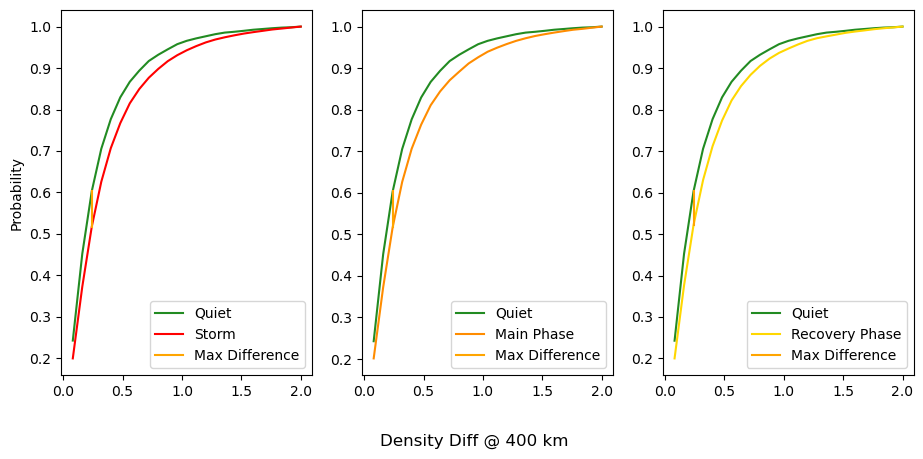

In [11]:
dist_1x = [qt_x, qt_x, qt_x]
dist_1y = [qt_y, qt_y, qt_y]

dist_2x = [st_x, mn_x, rc_x]
dist_2y = [st_y, mn_y, rc_y]
col = ['red','darkorange','gold']
lab = ['Storm', 'Main Phase', 'Recovery Phase']

fig2, ax2 = plt.subplots(1,3, figsize=(11,5),gridspec_kw={'bottom':0.15})

# histogram quiet time data
qt_count, qt_bins = np.histogram(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'], bins=h_bins)
qt_pdf = qt_count / sum(qt_count) # calculate pdf
qt_cdf = np.cumsum(qt_pdf) # calculate cdf

for axn, dist_x, dist_y, cc, ll in zip(ax2, dist_2x, dist_2y, col, lab):
    lp_count, lp_bins = np.histogram(sat_df.loc[gd_t & dist_x & dist_y,'den_diff'], bins=h_bins)
    lp_pdf = lp_count / sum(lp_count) # calculate pdf
    lp_cdf = np.cumsum(lp_pdf) # calculate cdf

    axn.plot(qt_bins[1:], qt_cdf, color="forestgreen", label="Quiet")
    axn.plot(lp_bins[1:], lp_cdf, color=cc, label=ll)

    # plotting max difference
    pos = np.argmax(qt_cdf-lp_cdf)
    x = [qt_bins[pos+1],qt_bins[pos+1]]
    y = [np.abs(qt_cdf[pos]-lp_cdf[pos])+np.min([qt_cdf[pos],lp_cdf[pos]]),np.min([qt_cdf[pos],lp_cdf[pos]])]
    axn.plot(x,y, color="orange", label='Max Difference')

    axn.legend()


ax2[0].set_ylabel('Probability')
fig2.supxlabel('Density Diff @ 400 km', y=0.002)